In [2]:
import pandas as pd
import numpy as np
import os
import csv
import json
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state
from sklearn.manifold import TSNE

# Embedding Similarity Analysis
This nodebook shows how to analyze the trained entity embeddings

In this example, we first load the trained entity embeddings and map them back into original entity names. And then apply two methodologies to analyze these embeddings:
 - Project all the entity embeddings into low dimension space and visualize their distribution.
 - Use cosine distance to analyze the similarity between each entity.

In [3]:
entity2id = json.load(open("dataset/embed/entity_to_id.json"))
id2entity = {int(v): k for k, v in entity2id.items()}
entity_emb = np.load('dataset/embed/entity_embeddings.npy')

## General Entity Embedding Clustering
Here we use t-SNE to convert entity embeddings into low dimension space and visualize their distribution.

In [16]:


# X_embedded = TSNE(n_components=2, n_jobs=40).fit_transform(entity_emb).T
X_embedded = TSNE(n_components=2, n_jobs=-1).fit_transform(entity_emb).T

#plt.savefig('entityation.png')

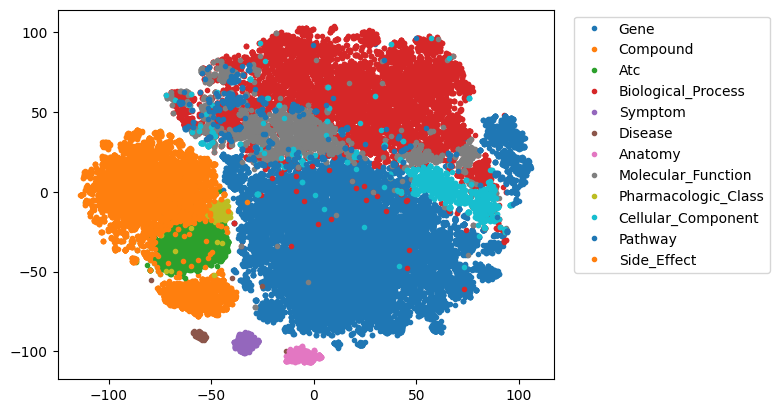

In [18]:
dataset_id = {}
for entity_name, i in entity2id.items():
    entity_key = entity_name.split('::')[0]
    if dataset_id.get(entity_key, None) is None:
        dataset_id[entity_key] = []
    dataset_id[entity_key].append(i)

p = cm.rainbow(int(255/2 * 1))
for key, val in dataset_id.items():
    val = np.asarray(val, dtype=int)

    plt.plot(X_embedded[0][val], X_embedded[1][val], '.', label=key)
    plt.legend(bbox_to_anchor=(0, 0, 1.45, 1.0))

plt.show()

## Calculate entity cosine similarity

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(entity_emb)

Plot entity cosine similarity distribution

In [5]:
similarity=similarity.flatten()
print(similarity.shape)

# cleanup self-compare and dup-compare
s = similarity < 0.99
s = np.unique(similarity[s])

(2231806564,)


: 

NameError: name 's' is not defined

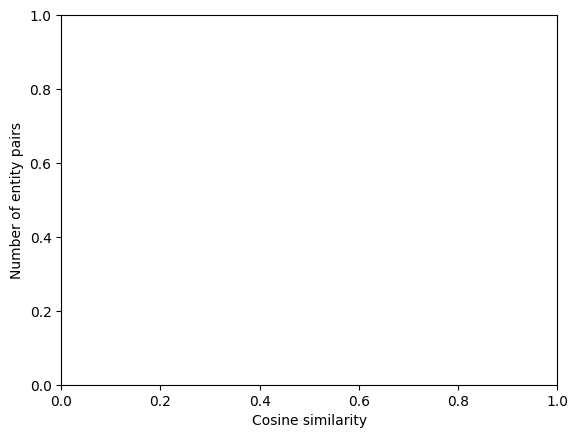

In [1]:
import matplotlib.pyplot as plt
plt.xlabel('Cosine similarity')
plt.ylabel('Number of entity pairs')
plt.hist(s)
plt.show()

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(entity_emb)
idx = np.flip(np.argsort(similarity), axis=1)

max_pairs = []
for i in range(idx.shape[0]):
    j = 1
    while (similarity[i][idx[i][j]] > 0.9):
        max_pairs.append((id2entity[idx[i][0]], id2entity[idx[i][j]], similarity[i][idx[i][j]]))
        j += 1

def sort_score(pair):
    return pair[2]

max_pairs.sort(reverse=True, key=sort_score)
sim_pairs = []
for i, pair in enumerate(max_pairs):
    if i % 2 == 0:
        sim_pairs.append(pair)

sim_pairs[:10]

[('Molecular Function::GO:0016817',
  'Molecular Function::GO:0016818',
  0.9998758),
 ('Biological Process::GO:0045936',
  'Biological Process::GO:0010563',
  0.9998726),
 ('Cellular Component::GO:0099512',
  'Cellular Component::GO:0099513',
  0.99986345),
 ('Biological Process::GO:0048870',
  'Biological Process::GO:0051674',
  0.999861),
 ('Cellular Component::GO:0000323',
  'Cellular Component::GO:0005764',
  0.99985904),
 ('Biological Process::GO:0043207',
  'Biological Process::GO:0051707',
  0.999855),
 ('Biological Process::GO:0044403',
  'Biological Process::GO:0044419',
  0.9998515),
 ('Biological Process::GO:0007272',
  'Biological Process::GO:0008366',
  0.99984413),
 ('Biological Process::GO:0006935',
  'Biological Process::GO:0042330',
  0.9998397),
 ('Biological Process::GO:0044106',
  'Biological Process::GO:0006576',
  0.99983937)]